## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace: part time
* Scheduled project review date/time: na
* Instructor name: James Irving, PhD
* Blog post URL: TBD


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
df = pd.read_csv("master_dataset4.csv")
pd.set_option('display.max_columns', 0)
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


In [2]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True, plot={'histogram': {'bins': 8}})
# profile.to_file(output_file="output.html")

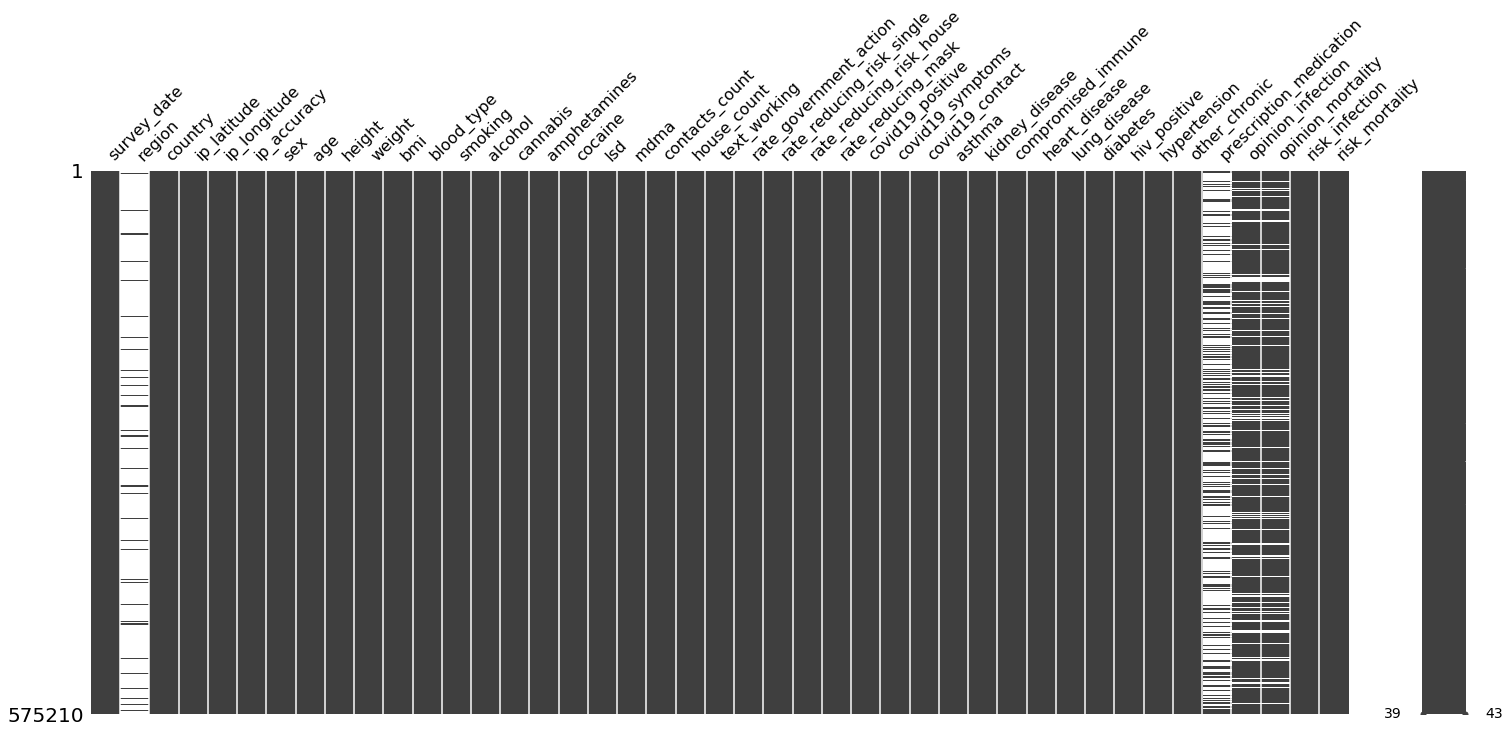

In [7]:
! pip install missingno
import missingno
missingno.matrix(df)

In [4]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls


,variable,%_Null
1,region,93.167342
38,prescription_medication,68.800876
40,opinion_mortality,17.445604
39,opinion_infection,17.445604
16,cocaine,4.705611
15,amphetamines,4.430825
17,lsd,4.089644
18,mdma,3.513255
14,cannabis,2.017198
21,text_working,0.683654


In [5]:
cols_to_drop_na = ['country','ip_accuracy','smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 
                   'contacts_count', 'text_working', 'rate_reducing_mask', 'risk_infection',
                  'risk_mortality']

In [6]:
df.dropna(subset=cols_to_drop_na, inplace=True)